In [7]:
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt


import os


if os.path.isfile('./test.txt'):
    os.remove('./test.txt')

# Load Models

In [8]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('landmarkDetector.dat')

# Load Dog Image

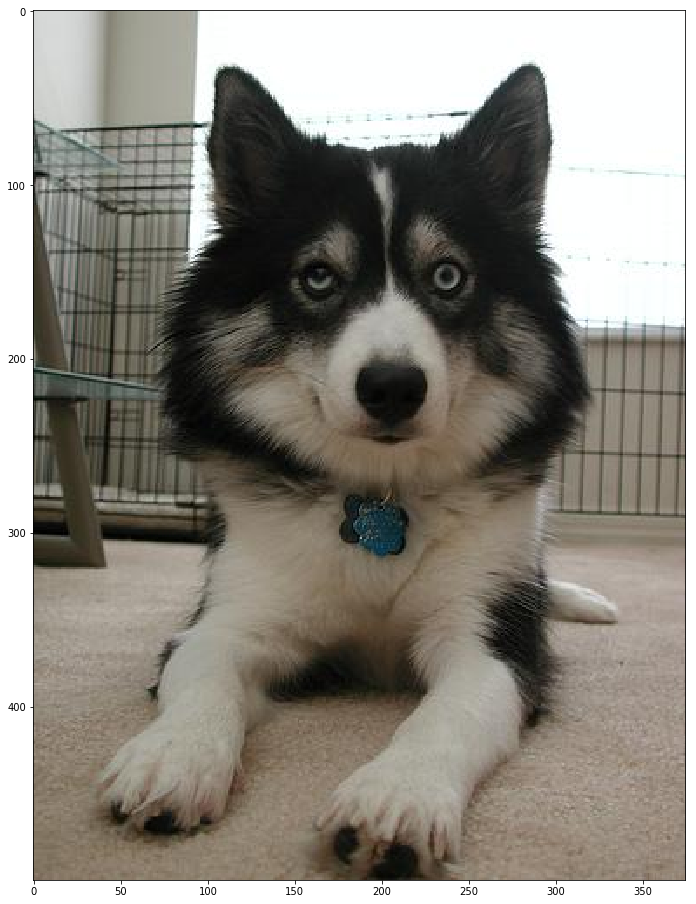

In [9]:
img_path = './dog1.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5)

plt.figure(figsize=(16, 16))
plt.imshow(img)

# Detect Faces

Detection 0: Left: 93 Top: 86 Right: 297 Bottom: 290 Confidence: 1.039278507232666


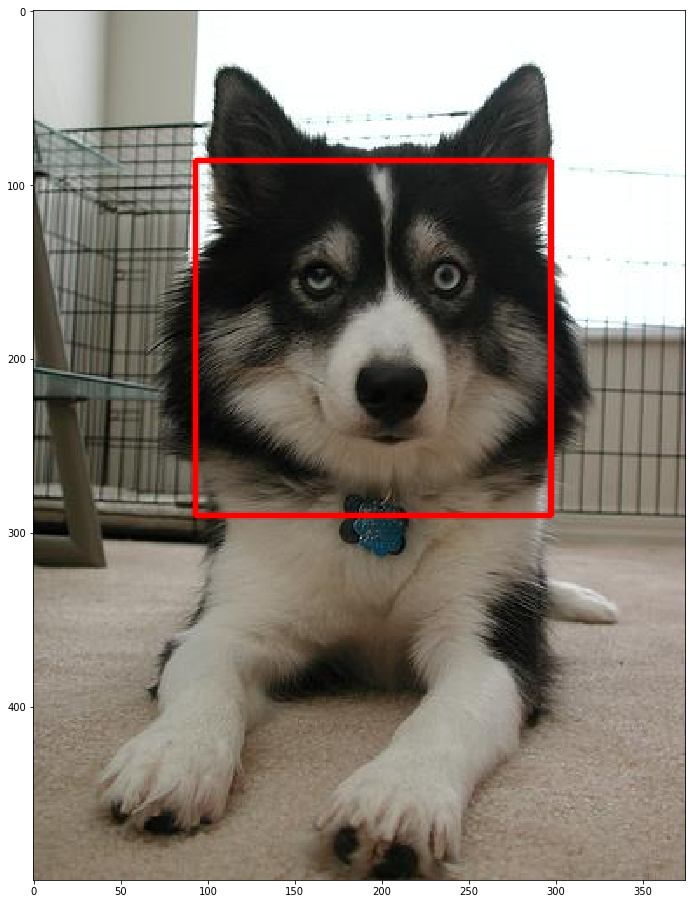

In [10]:
dets = detector(img, upsample_num_times=1)

print(dets)

img_result = img.copy()

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
    
plt.figure(figsize=(16, 16))
plt.imshow(img_result)




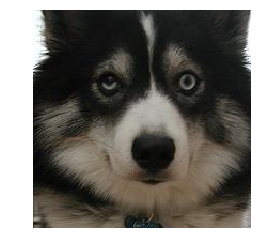

In [11]:

crop_img = img[y1:y2, x1:x2]
plt.imshow( crop_img)
plt.axis("off")
plt.savefig("dog.jpg")

In [12]:
import time

time.sleep(3)

from colorthief import ColorThief

color_thief = ColorThief('dog.jpg')
color_thief

dominant_color = color_thief.get_color(quality=1)
dominant_color

black= np.array([85,82,82])
brown= np.array([163,114,64])
yellow= np.array([197,177,149])
white= np.array([236,234,231])

color = np.array([black,brown,yellow, white])



min = 999999
chosen= 0
count =1

for e in color:
    sum=0
    for i in range(3):
        sum+= pow(dominant_color[i] - e[i],2)
    if min > sum :
        min = sum
        chosen = count
    count+=1



print(min)
print(chosen)

import random

f = open("test.txt","w")
f.write(str(chosen*3))
f.close()

print(chosen*3)

6734
1
3
